In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df_mvp = pd.read_html('https://www.basketball-reference.com/awards/mvp.html')

In [3]:
len(df_mvp)

3

In [4]:
df_mvp = df_mvp[0]

In [5]:
df_mvp.columns

MultiIndex(levels=[['Advanced', 'Per Game', 'Shooting', 'Unnamed: 0_level_0', 'Unnamed: 10_level_0', 'Unnamed: 11_level_0', 'Unnamed: 12_level_0', 'Unnamed: 13_level_0', 'Unnamed: 14_level_0', 'Unnamed: 15_level_0', 'Unnamed: 16_level_0', 'Unnamed: 17_level_0', 'Unnamed: 1_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0', 'Unnamed: 7_level_0', 'Unnamed: 8_level_0', 'Unnamed: 9_level_0'], ['3P%', 'AST', 'Age', 'BLK', 'FG%', 'FT%', 'G', 'Lg', 'MP', 'PTS', 'Player', 'STL', 'Season', 'TRB', 'Tm', 'Voting', 'WS', 'WS/48']],
           labels=[[3, 12, 1, 2, 0, 13, 14, 15, 16, 17, 4, 5, 6, 7, 8, 9, 10, 11], [12, 7, 10, 15, 2, 14, 6, 8, 9, 13, 1, 11, 3, 4, 0, 5, 16, 17]])

In [6]:
df_mvp.columns = df_mvp.columns.droplevel()

In [7]:
# History of MVP Seasons
df_mvp_new = df_mvp.drop(columns=['Voting','Lg','Tm','Player','Age','MP','STL','BLK','FG%','3P%','FT%','WS','WS/48','G'],axis=1)
df_mvp_pivot = df_mvp_new.pivot_table(columns='Season')

In [8]:
df_mvp1 = df_mvp_pivot.transpose()
df_mvp1 = df_mvp1.reset_index()
df_mvp1['Year'] = [int(i.split('-')[0]) for i in df_mvp1['Season']]
df_mvp1.drop('Season',axis=1)
df_mvp1 = df_mvp1.pivot_table(columns='Year')

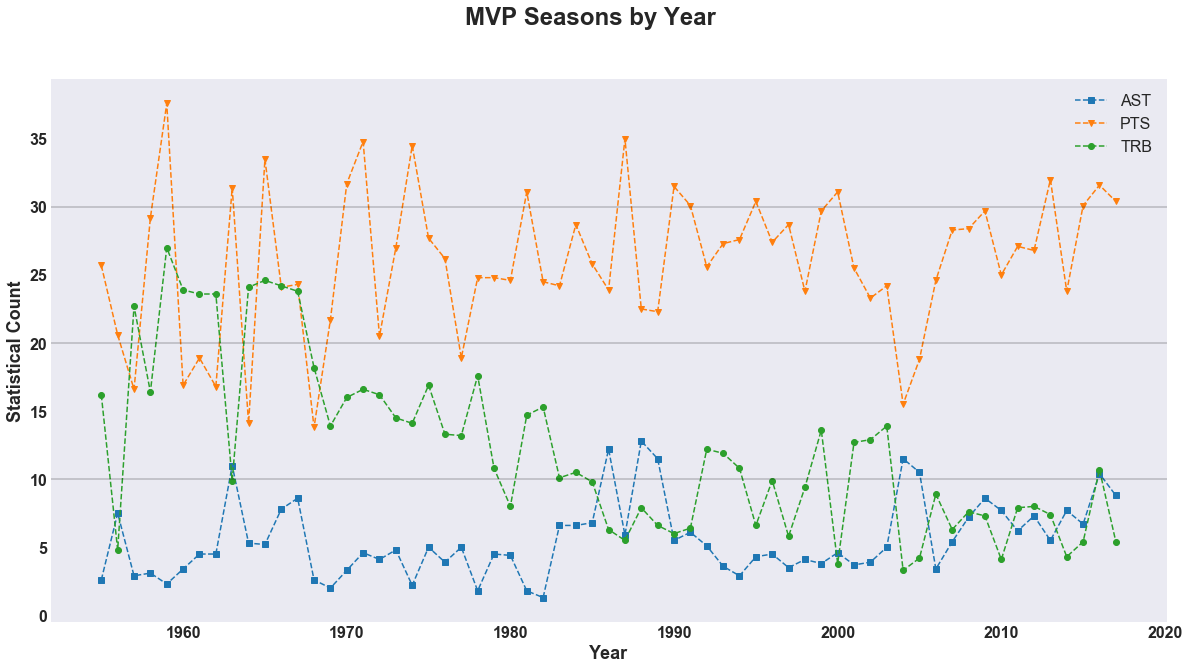

In [9]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('dark')
df_mvp1.transpose().plot(kind='line',fontsize=12, ax=ax, style=['s--','v--','o--'])
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.ylabel('Statistical Count', fontsize=18, fontweight='bold')
plt.suptitle('MVP Seasons by Year', fontsize=24, fontweight='bold')
plt.axhline(y=10, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=20, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=30, color='black', linestyle='-', linewidth=.33)
plt.legend(fontsize=16)

In [10]:
# MVP 3-Point Field Goal % By Year

In [11]:
df_3 = df_mvp.drop(columns=['Voting','Lg','Tm','Player','Age','MP','PTS','TRB','AST','STL','BLK','FG%','FT%','WS','WS/48','G'],axis=1)
df_3_pivot = df_3.pivot_table(columns='Season')

In [28]:
df_3_player = df_3_pivot.transpose()
df_3_player = df_3_player.reset_index()
df_3_player['Year'] = [int(i.split('-')[0]) for i in df_3_player['Season']]
df_3_player.drop('Season',axis=1)
df_3_player = df_3_player.pivot_table(columns='Year')

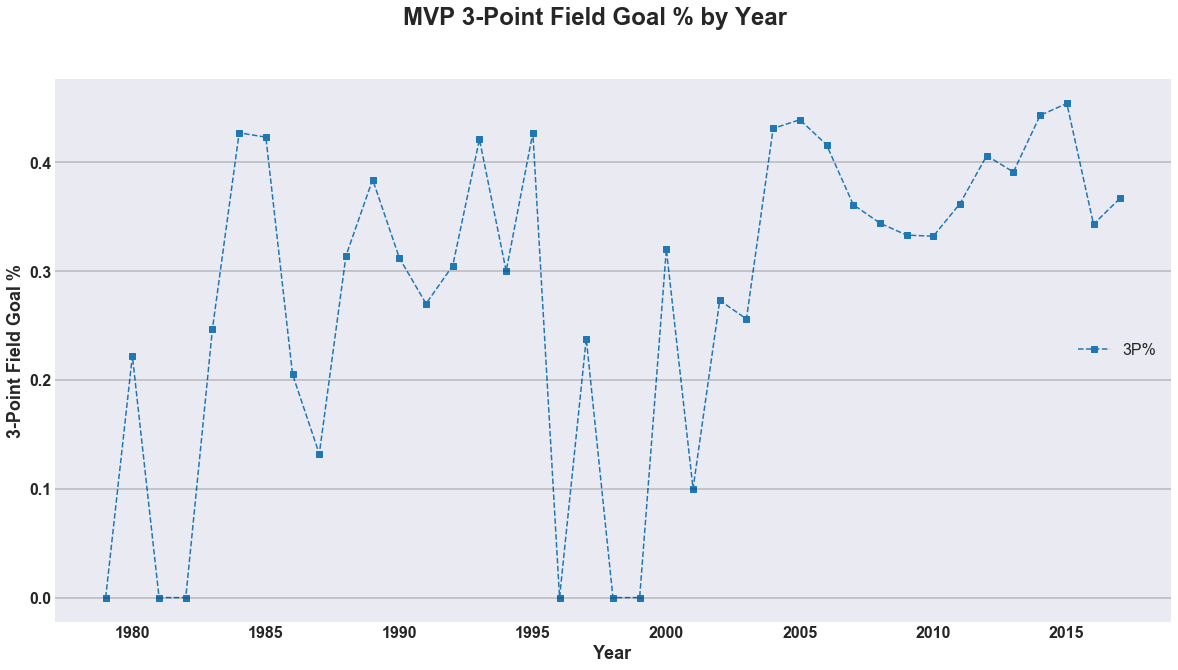

In [27]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('dark')
df_3_player.transpose().plot(kind='line',fontsize=12, ax=ax, style=['s--'])
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.ylabel('3-Point Field Goal %', fontsize=18, fontweight='bold')
plt.suptitle('MVP 3-Point Field Goal % by Year', fontsize=24, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=.1, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=.2, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=.3, color='black', linestyle='-', linewidth=.33)
plt.axhline(y=.4, color='black', linestyle='-', linewidth=.33)
plt.legend(loc=7, fontsize=16)

In [14]:
# MVP Height and Position Analysis

In [15]:
df_mvp_position = pd.read_html('https://basketball.realgm.com/nba/awards/by-type')

In [16]:
len(df_mvp_position)

2

In [17]:
df_mvp_position = df_mvp_position[0]

In [18]:
df_position = df_mvp_position.drop(columns=['Team','Weight','Age','Pre-Draft Team','Draft Yr','Player'],axis=1)
df_position['Season'] = [int(i.split('-')[0]) for i in df_position['Season']]
df_position[['Height','Inches']] = df_position['Height'].str.split('-',expand=True)
df_position[['Height','Inches']] = df_position[['Height','Inches']].apply(pd.to_numeric,errors='coerce',axis=1)
df_position['Height'] = df_position['Height']*12
df_position['Height'] = df_position['Height'] + df_position['Inches']
df_position = df_position.drop(columns=['Inches'])
df_position = df_position.rename(columns={'Height':'Height (in)'})

(array([70., 72., 74., 76., 78., 80., 82., 84., 86., 88.]),
 <a list of 10 Text yticklabel objects>)

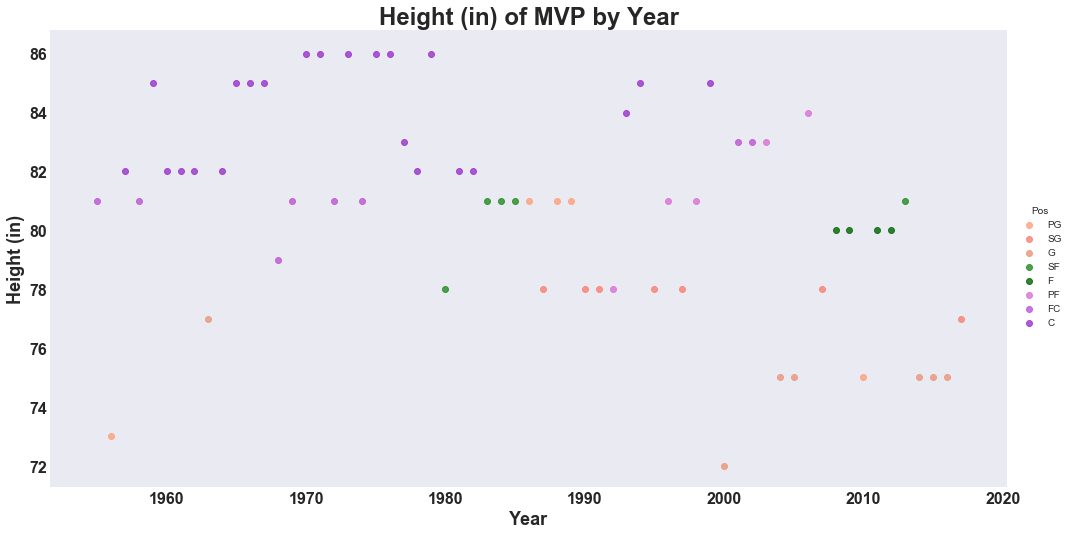

In [19]:
ax = sns.lmplot(x='Season',
           y='Height (in)',
           data=df_position,
           size=7,
           aspect=2,
           hue='Pos',
           palette=dict(PG='lightsalmon',SG='salmon',G='darksalmon',SF='forestgreen',F='darkgreen',PF='orchid',FC='mediumorchid',C='darkorchid'),
           fit_reg=False,
           legend=False)
ax.add_legend(label_order=['PG','SG','G','SF','F','PF','FC','C'])
plt.title('Height (in) of MVP by Year',fontsize=24,fontweight='bold')
plt.xlabel('Year',fontsize=18,fontweight='bold')
plt.ylabel('Height (in)',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

In [20]:
# MVP Winners by Position

In [21]:
df_pie = df_position.groupby('Pos').count()
df_pie['Season'] = df_pie['Season'].apply(pd.to_numeric,errors='coerce')
df_pie = df_pie.drop(columns=['Height (in)','YOS'])
df_pie = df_pie.rename(columns={'Season':'# of Wins'})

Text(0.5,1,'MVP Winners by Position (%)')

<Figure size 720x720 with 0 Axes>

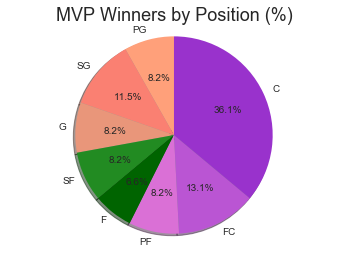

In [22]:
plt.figure(figsize=(10,10))
labels = 'PG','SG','G','SF','F','PF','FC','C'
sizes = [5, 7, 5, 5, 4, 5, 8, 22]
explode = (0, 0, 0, 0, 0, 0, 0, 0)
colors = ['lightsalmon','salmon','darksalmon','forestgreen','darkgreen','orchid','mediumorchid','darkorchid']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('MVP Winners by Position (%)', fontsize=18)